In [1]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.callbacks import Callback
from keras.datasets import mnist

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float16') / 255.
x_test = x_test.astype('float16') / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("training data: {}".format(x_train.shape))
print("testing data: {}".format(x_test.shape))

training data: (60000, 28, 28, 1)
testing data: (10000, 28, 28, 1)


# Network

In [3]:
model = Sequential([
    Convolution2D(20, kernel_size=5, padding="same", activation="relu", input_shape=(28, 28, 1,)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(10, activation="softmax"),
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                39210     
Total params: 39,730
Trainable params: 39,730
Non-trainable params: 0
_________________________________________________________________


# Hyper Parameters

In [4]:
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Training

In [5]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.loss = []
        self.acc = []

    def on_batch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        self.acc.append(logs.get('acc'))

In [6]:
history = LossHistory()
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=128, callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 20s - loss: 0.4260 - acc: 0.8738 - val_loss: 0.1841 - val_acc: 0.9492


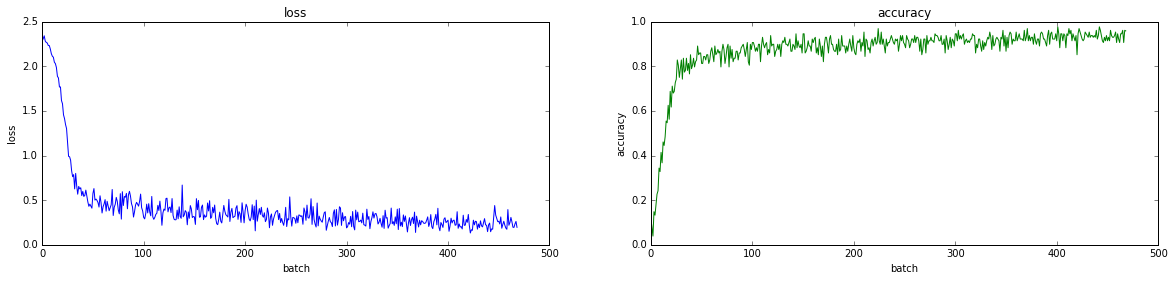

In [7]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)

plt.plot(history.loss)
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('batch')

plt.subplot(1, 2, 2)
plt.plot(history.acc, 'g')
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('batch')

# Test

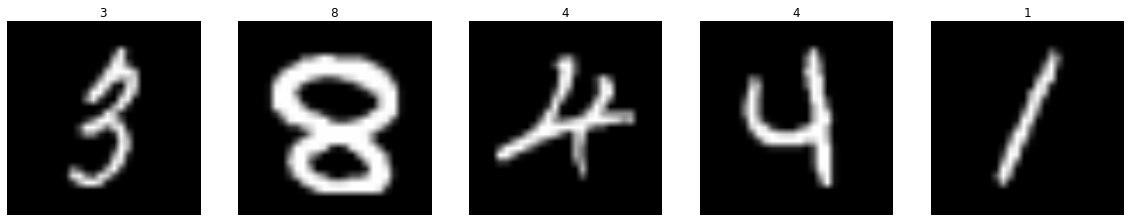

In [8]:
n_image = 5

display_index = np.random.choice(x_test.shape[0], n_image)
images = np.array([x_train[i] for i in display_index])
id_class = np.argmax(model.predict(images), axis=1)

plt.figure(figsize=(20, 4))

for i in range(n_image):
    ax = plt.subplot(1, n_image, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title("{0}".format(id_class[i]))
    